In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression

In [2]:
datasdp = pd.read_csv('D:\AAAAKK SKRIPSWEETT\Bismillah Code Skripsi V2\Dataset\dataset_sdp_undersampling.csv', delimiter=";")
datasdp.head()

,cbo,dit,fanin,fanout,lcom,noc,loc,rfc,wmc,totalMethodsQty,protectedMethodsQty,publicMethodsQty,privateMethodsQty,finalFieldsQty,protectedFieldsQty,publicFieldsQty,privateFieldsQty,bugs
0,5,1,0,5,250,0,470,38,37,36,0,36,0,1,0,0,1,0
1,5,2,4,5,34,0,57,15,15,12,0,12,0,2,0,1,2,0
2,15,3,2,15,13,0,176,31,30,6,0,6,0,0,0,0,2,0
3,5,2,2,5,0,0,46,4,12,6,0,6,0,0,0,0,3,0
4,6,1,0,6,15,0,42,11,6,6,0,6,0,0,0,0,0,0


In [5]:
from sklearn.model_selection import StratifiedKFold
datasdp = pd.read_csv('D:\AAAAKK SKRIPSWEETT\Bismillah Code Skripsi V2\Dataset\dataset_sdp_undersampling.csv', delimiter=";")

X = datasdp.drop(columns=['bugs'])
y = datasdp['bugs']

X_train, X_holdout, y_train, y_holdout = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_base, X_train_meta, y_train_base, y_train_meta = train_test_split(X_train, y_train, test_size=0.5, random_state=42)

counts_training = y_train.value_counts()
print("data distribiution data training: ", counts_training)
counts_testing = y_train_base.value_counts()
print("data distribiution data testing: ", counts_testing)

#insialisasi k-fold validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for fold, (train_idx, val_idx) in enumerate(skf.split(X_train_base, y_train_base), 1):
    X_train_fold, X_val_fold = X_train_base.iloc[train_idx], X_train_base.iloc[val_idx]
    y_train_fold, y_val_fold = y_train_base.iloc[train_idx], y_train_base.iloc[val_idx]

    print(f"Fold {fold} - Data Training Undersampled: {y_train.value_counts().to_dict()}")
    print(f"Fold {fold} - Data Validation: {y_val_fold.value_counts().to_dict()}")

data distribiution data training:  bugs
0    593
1    458
Name: count, dtype: int64
data distribiution data testing:  bugs
0    286
1    239
Name: count, dtype: int64
Fold 1 - Data Training Undersampled: {0: 593, 1: 458}
Fold 1 - Data Validation: {0: 58, 1: 47}
Fold 2 - Data Training Undersampled: {0: 593, 1: 458}
Fold 2 - Data Validation: {0: 57, 1: 48}
Fold 3 - Data Training Undersampled: {0: 593, 1: 458}
Fold 3 - Data Validation: {0: 57, 1: 48}
Fold 4 - Data Training Undersampled: {0: 593, 1: 458}
Fold 4 - Data Validation: {0: 57, 1: 48}
Fold 5 - Data Training Undersampled: {0: 593, 1: 458}
Fold 5 - Data Validation: {0: 57, 1: 48}


In [11]:
#1 Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, recall_score, f1_score, precision_score, classification_report

randomforest_classifier = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_leaf=2,
    criterion='gini',
    random_state=1
)

#insialisasi k-fold validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# List untuk menyimpan metrik setiap fold
roc_auc_scores = []
accuracy_scores = []
recall_scores = []
f1_scores = []
precision_scores = []

# Loop untuk K-Fold
for fold, (train_idx, val_idx) in enumerate(skf.split(X_train_base, y_train_base), 1):
    print(f"Training fold {fold}...")
    
    # Pisahkan data training dan validasi pada fold ini
    X_train_fold, X_val_fold = X_train_base.iloc[train_idx], X_train_base.iloc[val_idx]
    y_train_fold, y_val_fold = y_train_base.iloc[train_idx], y_train_base.iloc[val_idx]

    # Train model
    randomforest_classifier.fit(X_train_fold, y_train_fold)
    
    # Prediksi pada data validasi
    val_predictions = randomforest_classifier.predict(X_val_fold)

    # Hitung metrik evaluasi
    roc_auc = roc_auc_score(y_val_fold, val_predictions)
    accuracy = accuracy_score(y_val_fold, val_predictions)
    recall = recall_score(y_val_fold, val_predictions)
    f1score = f1_score(y_val_fold, val_predictions)
    precision = precision_score(y_val_fold, val_predictions)

    # Simpan hasil metrik di list
    roc_auc_scores.append(roc_auc)
    accuracy_scores.append(accuracy)
    recall_scores.append(recall)
    f1_scores.append(f1score)
    precision_scores.append(precision)

    # Print hasil per fold
    print(f'Fold {fold} - ROC AUC Score: {roc_auc:.4f}')
    print(f'Fold {fold} - Accuracy: {accuracy:.4f}')
    print(f'Fold {fold} - Recall: {recall:.4f}')
    print(f'Fold {fold} - F1 Score: {f1score:.4f}')
    print(f'Fold {fold} - Precision: {precision:.4f}')
    print('-' * 40)

# # Rata-rata metrik dari semua fold
# print(f'Average ROC AUC Score: {np.mean(roc_auc_scores):.4f}')
# print(f'Average Accuracy: {np.mean(accuracy_scores):.4f}')
# print(f'Average Recall: {np.mean(recall_scores):.4f}')
# print(f'Average F1 Score: {np.mean(f1_scores):.4f}')

# #train model
# randomforest_classifier.fit(X_train, y_train)
# val_predictions = randomforest_classifier.predict(X_train_base)

# #metrics calculation
# roc_auc = roc_auc_score(y_train_base, val_predictions)
# print('Validation roc auc score: ', roc_auc)

# accuracy = accuracy_score(y_train_base, val_predictions)
# print('validation accuracy : ', accuracy)

# recall = recall_score(y_train_base, val_predictions)
# print('validation recall : ', recall)

# f1score = f1_score(y_train_base, val_predictions)
# print('validation f1-score : ', f1score)

#classification report
print(classification_report(y_val_fold, val_predictions))


Training fold 1...
Fold 1 - ROC AUC Score: 0.8910
Fold 1 - Accuracy: 0.8952
Fold 1 - Recall: 0.8511
Fold 1 - F1 Score: 0.8791
Fold 1 - Precision: 0.9091
----------------------------------------
Training fold 2...
Fold 2 - ROC AUC Score: 0.7664
Fold 2 - Accuracy: 0.7714
Fold 2 - Recall: 0.7083
Fold 2 - F1 Score: 0.7391
Fold 2 - Precision: 0.7727
----------------------------------------
Training fold 3...
Fold 3 - ROC AUC Score: 0.8607
Fold 3 - Accuracy: 0.8667
Fold 3 - Recall: 0.7917
Fold 3 - F1 Score: 0.8444
Fold 3 - Precision: 0.9048
----------------------------------------
Training fold 4...
Fold 4 - ROC AUC Score: 0.8503
Fold 4 - Accuracy: 0.8571
Fold 4 - Recall: 0.7708
Fold 4 - F1 Score: 0.8315
Fold 4 - Precision: 0.9024
----------------------------------------
Training fold 5...
Fold 5 - ROC AUC Score: 0.9112
Fold 5 - Accuracy: 0.9143
Fold 5 - Recall: 0.8750
Fold 5 - F1 Score: 0.9032
Fold 5 - Precision: 0.9333
----------------------------------------
              precision    rec

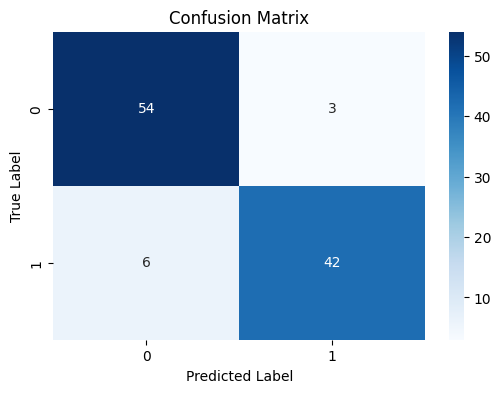

In [12]:
#Confussion Metrics of Random Forest
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_val_fold, val_predictions)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

Training fold 1...
Fold 1 - ROC AUC Score: 0.8910
Fold 1 - Accuracy: 0.8952
Fold 1 - Recall: 0.8511
Fold 1 - F1 Score: 0.8791
Fold 1 - Precision: 0.9091
----------------------------------------
Training fold 2...
Fold 2 - ROC AUC Score: 0.7664
Fold 2 - Accuracy: 0.7714
Fold 2 - Recall: 0.7083
Fold 2 - F1 Score: 0.7391
Fold 2 - Precision: 0.7727
----------------------------------------
Training fold 3...
Fold 3 - ROC AUC Score: 0.8607
Fold 3 - Accuracy: 0.8667
Fold 3 - Recall: 0.7917
Fold 3 - F1 Score: 0.8444
Fold 3 - Precision: 0.9048
----------------------------------------
Training fold 4...
Fold 4 - ROC AUC Score: 0.8503
Fold 4 - Accuracy: 0.8571
Fold 4 - Recall: 0.7708
Fold 4 - F1 Score: 0.8315
Fold 4 - Precision: 0.9024
----------------------------------------
Training fold 5...
Fold 5 - ROC AUC Score: 0.9112
Fold 5 - Accuracy: 0.9143
Fold 5 - Recall: 0.8750
Fold 5 - F1 Score: 0.9032
Fold 5 - Precision: 0.9333
----------------------------------------
              precision    rec

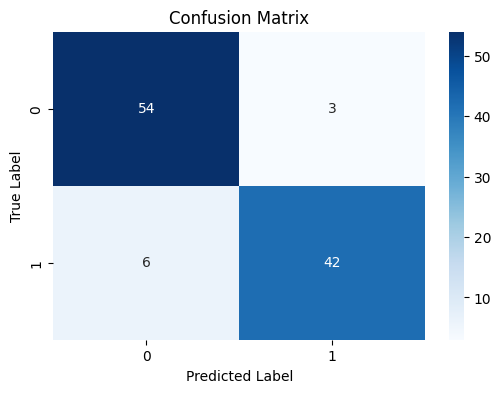

In [13]:
#Extra Trees
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, recall_score, f1_score, precision_score, classification_report

extratrees_classifier = ExtraTreesClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_leaf=2,
    criterion='gini',
    random_state=1
)
#insialisasi k-fold validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# List untuk menyimpan metrik setiap fold
roc_auc_scores = []
accuracy_scores = []
recall_scores = []
f1_scores = []
precision_scores = []

# Loop untuk K-Fold
for fold, (train_idx, val_idx) in enumerate(skf.split(X_train_base, y_train_base), 1):
    print(f"Training fold {fold}...")
    
    # Pisahkan data training dan validasi pada fold ini
    X_train_fold, X_val_fold = X_train_base.iloc[train_idx], X_train_base.iloc[val_idx]
    y_train_fold, y_val_fold = y_train_base.iloc[train_idx], y_train_base.iloc[val_idx]

    # Train model
    randomforest_classifier.fit(X_train_fold, y_train_fold)
    
    # Prediksi pada data validasi
    val_predictions = randomforest_classifier.predict(X_val_fold)

    # Hitung metrik evaluasi
    roc_auc = roc_auc_score(y_val_fold, val_predictions)
    accuracy = accuracy_score(y_val_fold, val_predictions)
    recall = recall_score(y_val_fold, val_predictions)
    f1score = f1_score(y_val_fold, val_predictions)
    precision = precision_score(y_val_fold, val_predictions)

    # Simpan hasil metrik di list
    roc_auc_scores.append(roc_auc)
    accuracy_scores.append(accuracy)
    recall_scores.append(recall)
    f1_scores.append(f1score)
    precision_scores.append(precision)

    # Print hasil per fold
    print(f'Fold {fold} - ROC AUC Score: {roc_auc:.4f}')
    print(f'Fold {fold} - Accuracy: {accuracy:.4f}')
    print(f'Fold {fold} - Recall: {recall:.4f}')
    print(f'Fold {fold} - F1 Score: {f1score:.4f}')
    print(f'Fold {fold} - Precision: {precision:.4f}')
    print('-' * 40)

#classification report
print(classification_report(y_val_fold, val_predictions))

#Confussion Metrics of Random Forest
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_val_fold, val_predictions)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


Training fold 1...
Fold 1 - ROC AUC Score: 0.8910
Fold 1 - Accuracy: 0.8952
Fold 1 - Recall: 0.8511
Fold 1 - F1 Score: 0.8791
Fold 1 - Precision: 0.9091
----------------------------------------
Training fold 2...
Fold 2 - ROC AUC Score: 0.7664
Fold 2 - Accuracy: 0.7714
Fold 2 - Recall: 0.7083
Fold 2 - F1 Score: 0.7391
Fold 2 - Precision: 0.7727
----------------------------------------
Training fold 3...
Fold 3 - ROC AUC Score: 0.8607
Fold 3 - Accuracy: 0.8667
Fold 3 - Recall: 0.7917
Fold 3 - F1 Score: 0.8444
Fold 3 - Precision: 0.9048
----------------------------------------
Training fold 4...
Fold 4 - ROC AUC Score: 0.8503
Fold 4 - Accuracy: 0.8571
Fold 4 - Recall: 0.7708
Fold 4 - F1 Score: 0.8315
Fold 4 - Precision: 0.9024
----------------------------------------
Training fold 5...
Fold 5 - ROC AUC Score: 0.9112
Fold 5 - Accuracy: 0.9143
Fold 5 - Recall: 0.8750
Fold 5 - F1 Score: 0.9032
Fold 5 - Precision: 0.9333
----------------------------------------
              precision    rec

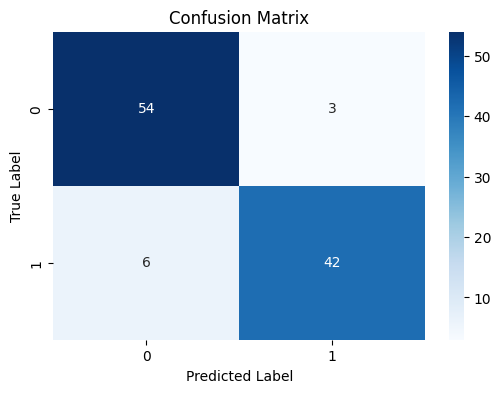

In [15]:
#3. Adapative Boosting (AdaaBoost)
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, recall_score, f1_score, precision_score, classification_report

adaboost_classifier = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1), 
    n_estimators=5000,
    random_state=1
)
#insialisasi k-fold validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# List untuk menyimpan metrik setiap fold
roc_auc_scores = []
accuracy_scores = []
recall_scores = []
f1_scores = []
precision_scores = []

# Loop untuk K-Fold
for fold, (train_idx, val_idx) in enumerate(skf.split(X_train_base, y_train_base), 1):
    print(f"Training fold {fold}...")
    
    # Pisahkan data training dan validasi pada fold ini
    X_train_fold, X_val_fold = X_train_base.iloc[train_idx], X_train_base.iloc[val_idx]
    y_train_fold, y_val_fold = y_train_base.iloc[train_idx], y_train_base.iloc[val_idx]

    # Train model
    randomforest_classifier.fit(X_train_fold, y_train_fold)
    
    # Prediksi pada data validasi
    val_predictions = randomforest_classifier.predict(X_val_fold)

    # Hitung metrik evaluasi
    roc_auc = roc_auc_score(y_val_fold, val_predictions)
    accuracy = accuracy_score(y_val_fold, val_predictions)
    recall = recall_score(y_val_fold, val_predictions)
    f1score = f1_score(y_val_fold, val_predictions)
    precision = precision_score(y_val_fold, val_predictions)

    # Simpan hasil metrik di list
    roc_auc_scores.append(roc_auc)
    accuracy_scores.append(accuracy)
    recall_scores.append(recall)
    f1_scores.append(f1score)
    precision_scores.append(precision)

    # Print hasil per fold
    print(f'Fold {fold} - ROC AUC Score: {roc_auc:.4f}')
    print(f'Fold {fold} - Accuracy: {accuracy:.4f}')
    print(f'Fold {fold} - Recall: {recall:.4f}')
    print(f'Fold {fold} - F1 Score: {f1score:.4f}')
    print(f'Fold {fold} - Precision: {precision:.4f}')
    print('-' * 40)

#classification report
print(classification_report(y_val_fold, val_predictions))

#Confussion Metrics of Random Forest
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_val_fold, val_predictions)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


Validation roc auc score:  0.9452336366562308
validation accuracy :  0.9485714285714286
validation recall :  0.9079497907949791
validation f1-score :  0.9414316702819957
validation precision :  0.9774774774774775
              precision    recall  f1-score   support

           0       0.93      0.98      0.95       286
           1       0.98      0.91      0.94       239

    accuracy                           0.95       525
   macro avg       0.95      0.95      0.95       525
weighted avg       0.95      0.95      0.95       525



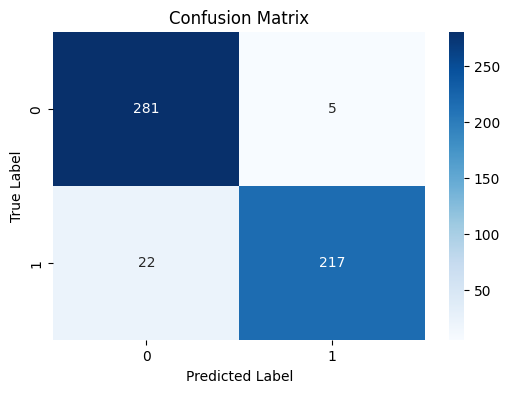

In [18]:
#1 Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, recall_score, f1_score, precision_score, classification_report

randomforest_classifier = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_leaf=2,
    criterion='gini',
    random_state=1
)

# #insialisasi k-fold validation
# skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# # List untuk menyimpan metrik setiap fold
# roc_auc_scores = []
# accuracy_scores = []
# recall_scores = []
# f1_scores = []
# precision_scores = []

# # Loop untuk K-Fold
# for fold, (train_idx, val_idx) in enumerate(skf.split(X_train_base, y_train_base), 1):
#     print(f"Training fold {fold}...")
    
#     # Pisahkan data training dan validasi pada fold ini
#     X_train_fold, X_val_fold = X_train_base.iloc[train_idx], X_train_base.iloc[val_idx]
#     y_train_fold, y_val_fold = y_train_base.iloc[train_idx], y_train_base.iloc[val_idx]

#     # Train model
#     randomforest_classifier.fit(X_train_fold, y_train_fold)
    
#     # Prediksi pada data validasi
#     val_predictions = randomforest_classifier.predict(X_val_fold)

#     # Hitung metrik evaluasi
#     roc_auc = roc_auc_score(y_val_fold, val_predictions)
#     accuracy = accuracy_score(y_val_fold, val_predictions)
#     recall = recall_score(y_val_fold, val_predictions)
#     f1score = f1_score(y_val_fold, val_predictions)
#     precision = precision_score(y_val_fold, val_predictions)

#     # Simpan hasil metrik di list
#     roc_auc_scores.append(roc_auc)
#     accuracy_scores.append(accuracy)
#     recall_scores.append(recall)
#     f1_scores.append(f1score)
#     precision_scores.append(precision)

#     # Print hasil per fold
#     print(f'Fold {fold} - ROC AUC Score: {roc_auc:.4f}')
#     print(f'Fold {fold} - Accuracy: {accuracy:.4f}')
#     print(f'Fold {fold} - Recall: {recall:.4f}')
#     print(f'Fold {fold} - F1 Score: {f1score:.4f}')
#     print(f'Fold {fold} - Precision: {precision:.4f}')
#     print('-' * 40)

# # Rata-rata metrik dari semua fold
# print(f'Average ROC AUC Score: {np.mean(roc_auc_scores):.4f}')
# print(f'Average Accuracy: {np.mean(accuracy_scores):.4f}')
# print(f'Average Recall: {np.mean(recall_scores):.4f}')
# print(f'Average F1 Score: {np.mean(f1_scores):.4f}')

#train model
randomforest_classifier.fit(X_train, y_train)
val_predictions = randomforest_classifier.predict(X_train_base)

#metrics calculation
roc_auc = roc_auc_score(y_train_base, val_predictions)
print('Validation roc auc score: ', roc_auc)

accuracy = accuracy_score(y_train_base, val_predictions)
print('validation accuracy : ', accuracy)

recall = recall_score(y_train_base, val_predictions)
print('validation recall : ', recall)

f1score = f1_score(y_train_base, val_predictions)
print('validation f1-score : ', f1score)

precision  = precision_score(y_train_base, val_predictions)
print('validation precision : ', precision)

#classification report
print(classification_report(y_train_base, val_predictions))

#Confussion Metrics of Random Forest
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_train_base, val_predictions)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()



Validation roc auc score:  0.9452336366562308
validation accuracy :  0.9485714285714286
validation recall :  0.9079497907949791
validation f1-score :  0.9414316702819957
validation precision :  0.9774774774774775
              precision    recall  f1-score   support

           0       0.93      0.98      0.95       286
           1       0.98      0.91      0.94       239

    accuracy                           0.95       525
   macro avg       0.95      0.95      0.95       525
weighted avg       0.95      0.95      0.95       525



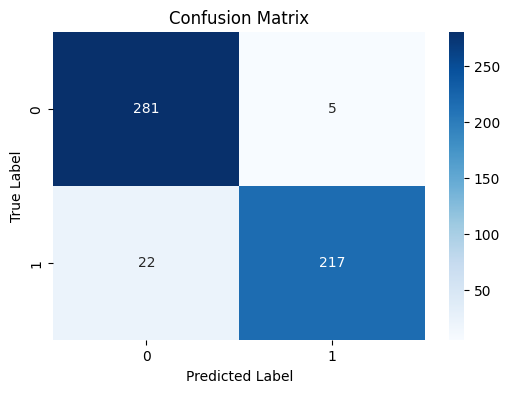

In [19]:
#1 extra trees
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, recall_score, f1_score, precision_score, classification_report

extratrees_classifier = ExtraTreesClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_leaf=2,
    criterion='gini',
    random_state=1
)

# #insialisasi k-fold validation
# skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# # List untuk menyimpan metrik setiap fold
# roc_auc_scores = []
# accuracy_scores = []
# recall_scores = []
# f1_scores = []
# precision_scores = []

# # Loop untuk K-Fold
# for fold, (train_idx, val_idx) in enumerate(skf.split(X_train_base, y_train_base), 1):
#     print(f"Training fold {fold}...")
    
#     # Pisahkan data training dan validasi pada fold ini
#     X_train_fold, X_val_fold = X_train_base.iloc[train_idx], X_train_base.iloc[val_idx]
#     y_train_fold, y_val_fold = y_train_base.iloc[train_idx], y_train_base.iloc[val_idx]

#     # Train model
#     randomforest_classifier.fit(X_train_fold, y_train_fold)
    
#     # Prediksi pada data validasi
#     val_predictions = randomforest_classifier.predict(X_val_fold)

#     # Hitung metrik evaluasi
#     roc_auc = roc_auc_score(y_val_fold, val_predictions)
#     accuracy = accuracy_score(y_val_fold, val_predictions)
#     recall = recall_score(y_val_fold, val_predictions)
#     f1score = f1_score(y_val_fold, val_predictions)
#     precision = precision_score(y_val_fold, val_predictions)

#     # Simpan hasil metrik di list
#     roc_auc_scores.append(roc_auc)
#     accuracy_scores.append(accuracy)
#     recall_scores.append(recall)
#     f1_scores.append(f1score)
#     precision_scores.append(precision)

#     # Print hasil per fold
#     print(f'Fold {fold} - ROC AUC Score: {roc_auc:.4f}')
#     print(f'Fold {fold} - Accuracy: {accuracy:.4f}')
#     print(f'Fold {fold} - Recall: {recall:.4f}')
#     print(f'Fold {fold} - F1 Score: {f1score:.4f}')
#     print(f'Fold {fold} - Precision: {precision:.4f}')
#     print('-' * 40)

# # Rata-rata metrik dari semua fold
# print(f'Average ROC AUC Score: {np.mean(roc_auc_scores):.4f}')
# print(f'Average Accuracy: {np.mean(accuracy_scores):.4f}')
# print(f'Average Recall: {np.mean(recall_scores):.4f}')
# print(f'Average F1 Score: {np.mean(f1_scores):.4f}')

#train model
randomforest_classifier.fit(X_train, y_train)
val_predictions = randomforest_classifier.predict(X_train_base)

#metrics calculation
roc_auc = roc_auc_score(y_train_base, val_predictions)
print('Validation roc auc score: ', roc_auc)

accuracy = accuracy_score(y_train_base, val_predictions)
print('validation accuracy : ', accuracy)

recall = recall_score(y_train_base, val_predictions)
print('validation recall : ', recall)

f1score = f1_score(y_train_base, val_predictions)
print('validation f1-score : ', f1score)

precision  = precision_score(y_train_base, val_predictions)
print('validation precision : ', precision)

#classification report
print(classification_report(y_train_base, val_predictions))

#Confussion Metrics of Random Forest
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_train_base, val_predictions)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

